In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
import datasets
import tsa

In [255]:
def bass1(Nt, m, p, q):
    return Nt + (p + q * Nt / m)(m - Nt)

def bass2(t, m, p, q):
    boo = math.exp(-t * (p + q))
    return m * (1 - boo) / (1 + boo * q / p)

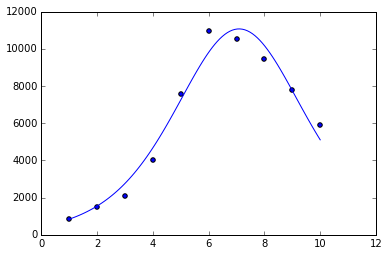

In [25]:
from scipy.optimize import minimize

sales = [840, 1470, 2110, 4000, 7590, 10950, 10530, 9470, 7790, 5890]
n = len(sales)
plt.scatter(range(1, n + 1), sales)

def S(m, p, q, t):
    neget = math.exp(-(p + q) * t)
    return m * (((p + q) ** 2 / p) * neget) / (1 + (q / p) * neget) ** 2
    
def fun(x):
    m, p, q = x
    return sum([(sales[i] - S(m, p, q, i + 1)) ** 2 for i in range(n)])
        
m, p, q = minimize(fun, [100.0, 0.1, 0.1]).x
tt = np.linspace(1, 10, 101)

plt.plot(tt, [S(m, p, q, t) for t in tt])

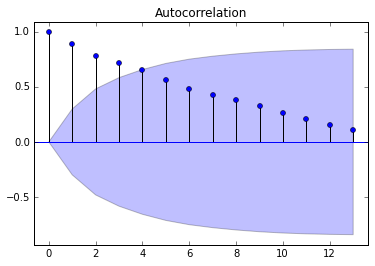

In [248]:
sm.graphics.tsa.plot_acf(df.Activity.values, lags = 13)
plt.show()

In [217]:
ts = datasets.passengers()
parts = sm.tsa.seasonal_decompose(ts.values, model = 'multiplicative', freq = 12)
acf = sm.tsa.acf(ts, nlags = 100)

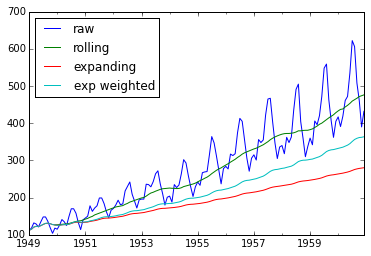

In [218]:
ts.plot(label = 'raw')
ts.rolling(12).mean().plot(label = 'rolling')
ts.expanding().mean().plot(label = 'expanding')
ts.ewm(com = 50).mean().plot(label = 'exp weighted')
plt.legend(loc ='upper left')
plt.show()

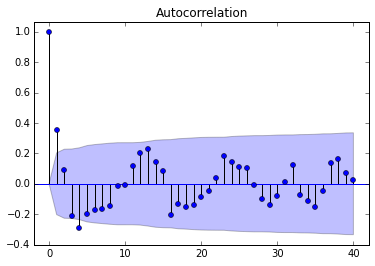

In [224]:
sm.graphics.tsa.plot_acf(parts.resid[7 : 100], lags = 40)
plt.show()

In [19]:
fit = sm.tsa.AR(ts).fit(3)
print fit.params
print fit.aic, fit.bic, fit.hqic

const    16.944345
L1.y      1.301721
L2.y     -0.509949
L3.y     -0.130250
dtype: float64
5.63580397958 5.69664687341 5.66013716178


In [61]:
fit = sm.tsa.ARMA(ts, (3, 3)).fit()
print fit.params
print fit.aic, fit.bic, fit.hqic

const      48.865608
ar.L1.y     2.546062
ar.L2.y    -2.441383
ar.L3.y     0.869939
ma.L1.y    -1.411675
ma.L2.y     0.431192
ma.L3.y     0.159175
dtype: float64
2575.6956449 2605.56237512 2587.63642059


In [164]:
ts.index.month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8])

In [315]:
seasons = ts.groupby(ts.index.month)
seasons.mean()

1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
dtype: float64